# Hello Everyone❤️

Real_Fake news detection 


In [2]:
import pandas as pd
import warnings 
warnings.filterwarnings(action='ignore')
import re
import string
import matplotlib.pyplot as plt

In [3]:
real=pd.read_csv('DataSet_Misinfo_TRUE.csv')
fake=pd.read_csv('DataSet_Misinfo_FAKE.csv')


In [4]:
real['class']=1
fake['class']=0
data=pd.concat([real,fake])

In [5]:
data.head(10)

,Unnamed: 0,text,class
0,0,The head of a conservative Republican faction ...,1
1,1,Transgender people will be allowed for the fir...,1
2,2,The special counsel investigation of links bet...,1
3,3,Trump campaign adviser George Papadopoulos tol...,1
4,4,President Donald Trump called on the U.S. Post...,1
5,5,The White House said on Friday it was set to k...,1
6,6,President Donald Trump said on Thursday he bel...,1
7,7,While the Fake News loves to talk about my so-...,1
8,8,"Together, we are MAKING AMERICA GREAT AGAIN! b...",1
9,9,Alabama Secretary of State John Merrill said h...,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78617 entries, 0 to 43641
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  78617 non-null  int64 
 1   text        78588 non-null  object
 2   class       78617 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.4+ MB


<AxesSubplot:xlabel='class', ylabel='count'>

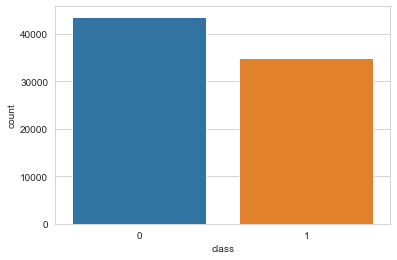

In [5]:
import seaborn as sns
sns.set_style("whitegrid")
sns.countplot(data['class'])

In [6]:
data.isnull().sum()

Unnamed: 0     0
text          29
class          0
dtype: int64

In [7]:
data=data.dropna()
data=data.drop(["Unnamed: 0"],axis=1)


In [8]:
data.head()

,text,class
0,The head of a conservative Republican faction ...,1
1,Transgender people will be allowed for the fir...,1
2,The special counsel investigation of links bet...,1
3,Trump campaign adviser George Papadopoulos tol...,1
4,President Donald Trump called on the U.S. Post...,1


In [9]:
def clear_fun(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [10]:
data['text']=data['text'].apply(clear_fun)

Plotting fake news stopwords

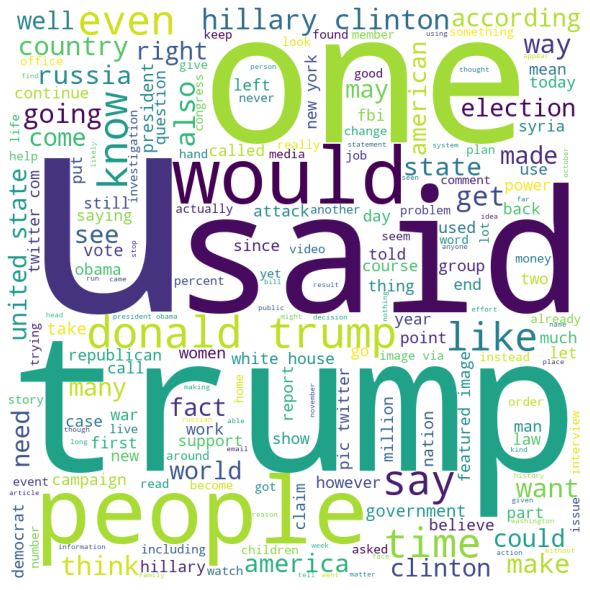

In [11]:
from nltk.corpus import stopwords
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords.words('english'), 
                min_font_size = 10).generate(" ".join(data[data['class'] == 0].text)) 
  
# plot fake news data                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

Plotting real news stopwords

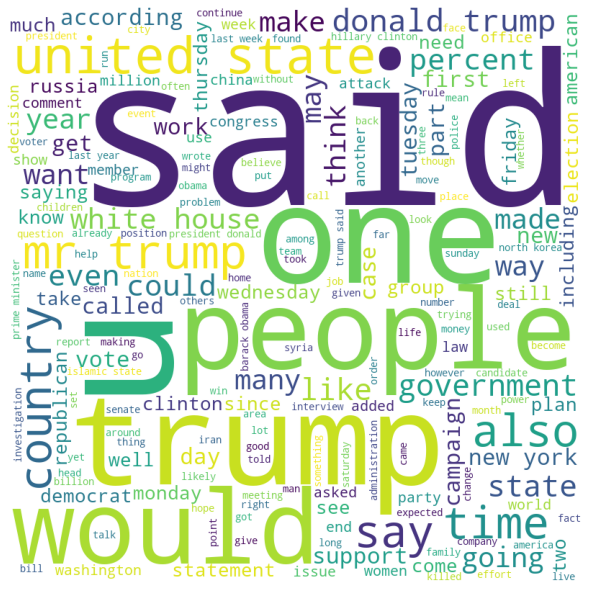

In [12]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords.words('english'), 
                min_font_size = 10).generate(" ".join(data[data['class'] == 1].text)) 
  
# plot real news data                     
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

In [13]:
#split data into training and testing
import sklearn
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data['text'],data['class'],test_size=0.2, random_state = 1)

accuracy:   95.725


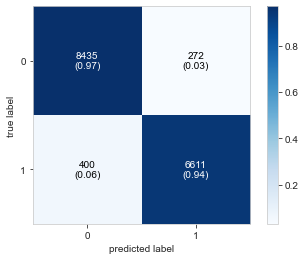

In [14]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics                                                 
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LinearSVC())
])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)

score = metrics.accuracy_score(y_test, prediction)
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test, prediction, labels=[0,1])



fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()